In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
nb = pd.read_csv('../Datasets/NB.csv')
nb['Fault'] = 0

ir = pd.read_csv('../Datasets/IR - 21.csv')
ir['Fault'] = 1

In [3]:
dataset = nb.append(ir)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_12368\156461942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = nb.append(ir)


DE        FE  Fault
0       0.064254  0.038625      0
1       0.063002  0.096769      0
2      -0.004381  0.127382      0
3      -0.035882  0.144640      0
4      -0.023991  0.086702      0
...          ...       ...    ...
121150  0.041421 -0.061431      1
121151  0.079187  0.121218      1
121152 -0.083654  0.120807      1
121153 -0.031269 -0.092865      1
121154  0.196140  0.030818      1

[242310 rows x 3 columns]

In [4]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [8]:
classifier = Sequential()

In [9]:
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

In [10]:
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

In [11]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [12]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [15]:
model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 100, shuffle = False)


Epoch 1/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8531
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8531
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8530
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8530
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8530
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8530
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8530
Epoch 8/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8531
Epoch 9/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8531
Epoch 10/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3381 - accura

194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8532
Epoch 82/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8532
Epoch 83/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8533
Epoch 84/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8532
Epoch 85/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8532
Epoch 86/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8533
Epoch 87/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8533
Epoch 88/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8533
Epoch 89/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8532
Epoch 90/100
194/194 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

1515/1515 [==============================] - 2s 929us/step


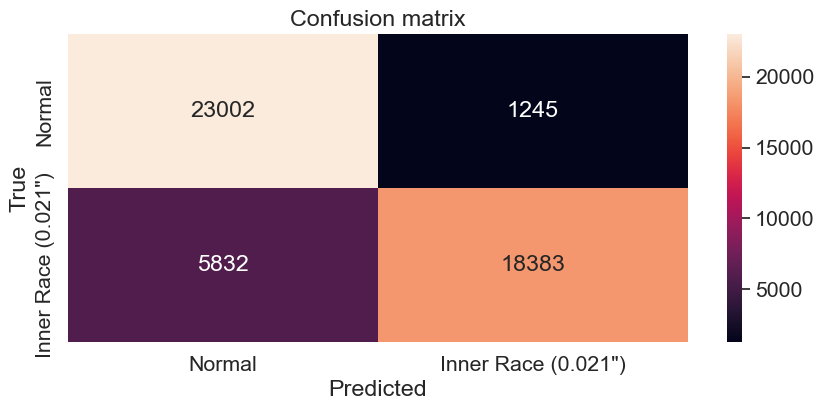

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.021")']  
columns = ['Normal', 'Inner Race (0.021")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [16]:
classifier.evaluate(X_test, y_test)

48462/48462 [==============================] - 1s 15us/step


[0.4157048230086388, 0.8100367188453674]

In [18]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.80      0.95      0.87     24247
Inner Race (0.021")       0.94      0.76      0.84     24215

           accuracy                           0.85     48462
          macro avg       0.87      0.85      0.85     48462
       weighted avg       0.87      0.85      0.85     48462



In [19]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 7077
